### 1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

### 1.1 Import dataset

In [2]:
df_titanic_test = pd.read_csv('test.csv')
df = pd.read_csv('train.csv')

In [3]:
# df = pd.concat([df_titanic_train, df_titanic_test], axis=0)  # stack rows on top of each other

# df.tail(5)

# df

### 2 EDA

In [4]:

missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percentage
}).sort_values('Missing_Percentage', ascending=False)

print("Missing values per column:")
display(missing_df[missing_df['Missing_Count'] > 0])


Missing values per column:


,Missing_Count,Missing_Percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


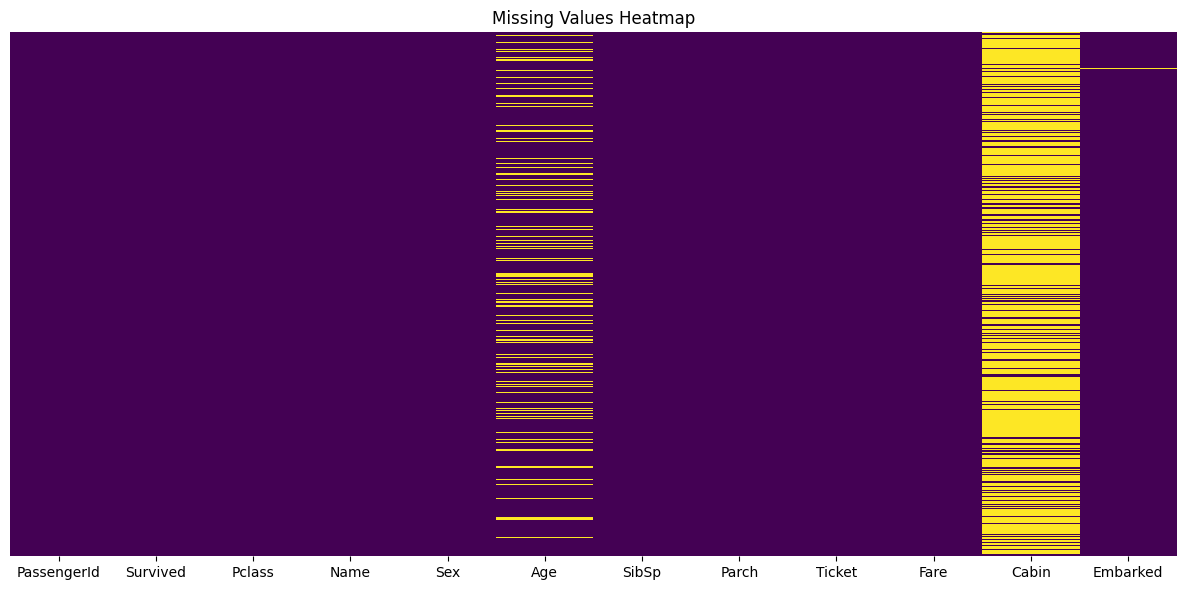

In [5]:

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()


In [6]:
# Create family size column (SibSp + Parch + 1 for the passenger themselves)
df['family_size'] = df['SibSp'] + df['Parch'] + 1
df['fare_per_person'] = df['Fare']/df['family_size']
# Create family category column
df['family_category'] = df['family_size'].apply(lambda x: 'Alone' if x == 1 else 
              'Small (2-4)' if x <= 4 else 
              'Large (5+)'
)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,fare_per_person,family_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,3.62500,Small (2-4)
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,35.64165,Small (2-4)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,7.92500,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,26.55000,Small (2-4)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,8.05000,Alone


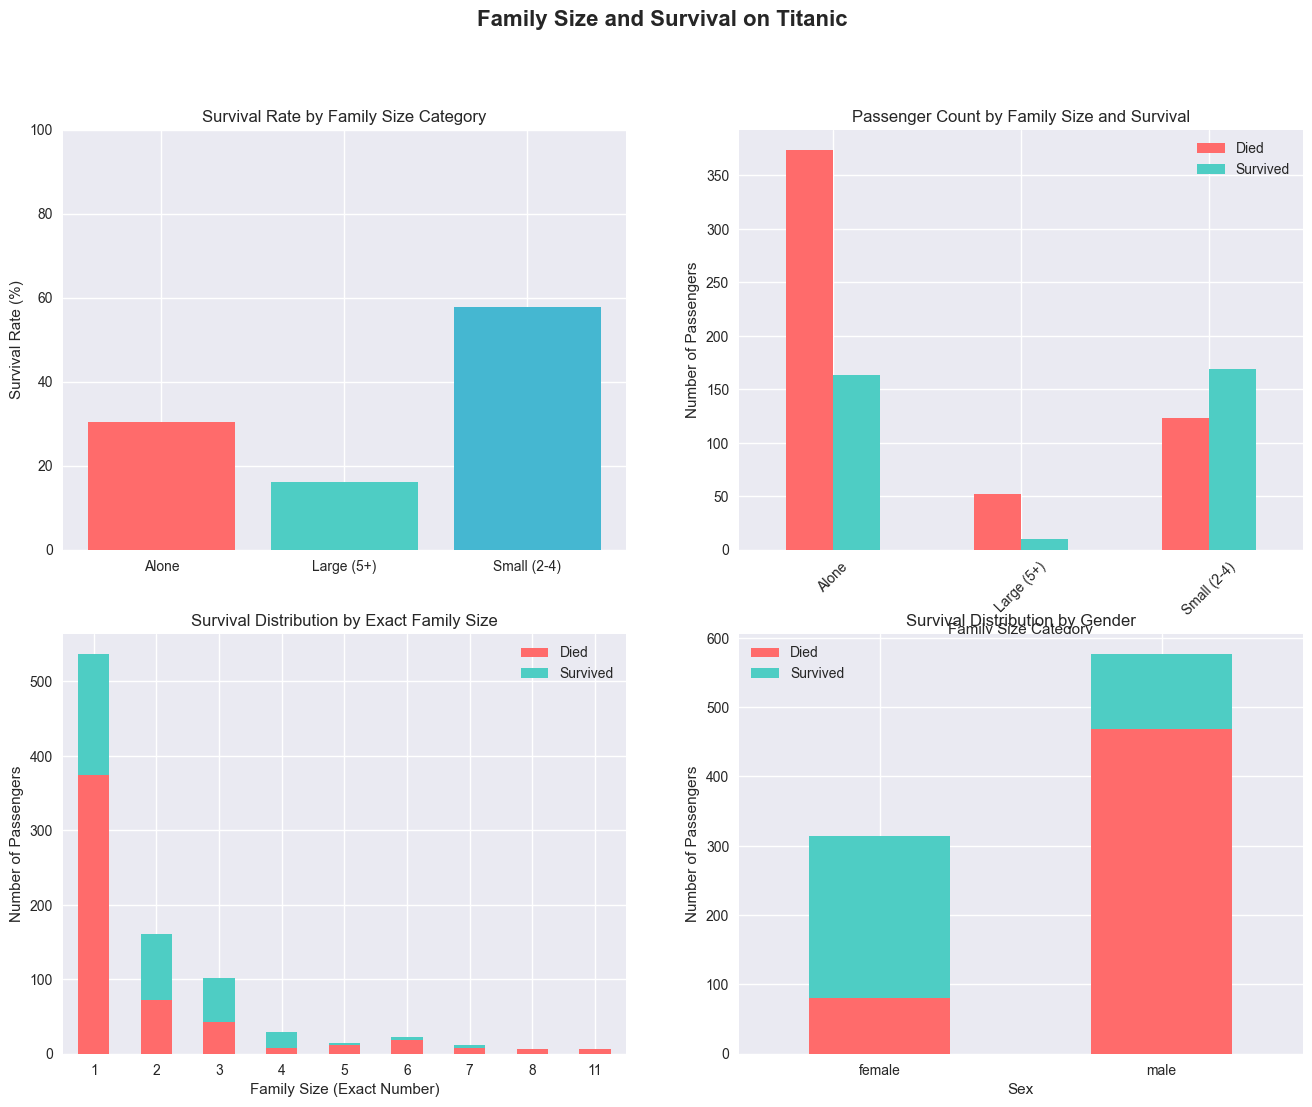

In [7]:

# Set up the plotting style
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Family Size and Survival on Titanic', fontsize=16, fontweight='bold')

# 1. Bar plot: Survival rate by family size category
family_survival = df.groupby('family_category')['Survived'].mean().reset_index()
bars = axes[0,0].bar(family_survival['family_category'], family_survival['Survived'] * 100, 
                    color=['#FF6B6B', '#4ECDC4', '#45B7D1'])



axes[0,0].set_ylabel('Survival Rate (%)')
axes[0,0].set_title('Survival Rate by Family Size Category')
axes[0,0].set_ylim(0, 100)


# 2. Count plot: Number of survivors/non-survivors by family size
survival_counts = df.groupby(['family_category', 'Survived']).size().unstack()
survival_counts.plot(kind='bar', ax=axes[0,1], color=['#FF6B6B', '#4ECDC4'])
axes[0,1].set_xlabel('Family Size Category')
axes[0,1].set_ylabel('Number of Passengers')
axes[0,1].set_title('Passenger Count by Family Size and Survival')
axes[0,1].legend(['Died', 'Survived'])
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Stacked bar plot: Survival distribution by exact family size
family_size_survival = df.groupby(['family_size', 'Survived']).size().unstack()
family_size_survival.plot(kind='bar', stacked=True, ax=axes[1,0], 
                         color=['#FF6B6B', '#4ECDC4'])
axes[1,0].set_xlabel('Family Size (Exact Number)')
axes[1,0].set_ylabel('Number of Passengers')
axes[1,0].set_title('Survival Distribution by Exact Family Size')
axes[1,0].legend(['Died', 'Survived'])
axes[1,0].tick_params(axis='x', rotation=0)


# 4. Bar plot: Male vs Female survival counts
gender_survival = df.groupby(['Sex', 'Survived']).size().unstack()

gender_survival.plot(kind='bar', stacked=True, ax=axes[1,1],
                     color=['#FF6B6B', '#4ECDC4'])

axes[1,1].set_xlabel('Sex')
axes[1,1].set_ylabel('Number of Passengers')
axes[1,1].set_title('Survival Distribution by Gender')
axes[1,1].legend(['Died', 'Survived'])
axes[1,1].tick_params(axis='x', rotation=0)



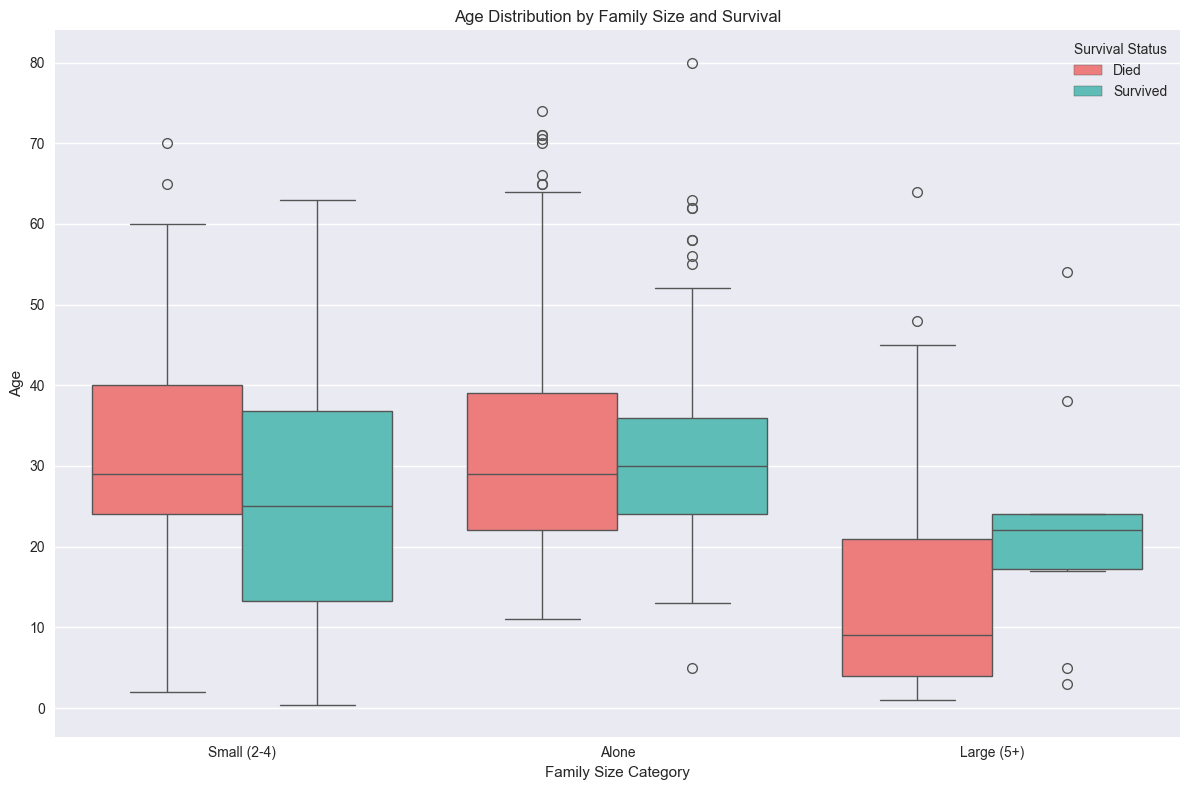

In [8]:

# Convert survived to categorical with meaningful labels
df = df.reset_index(drop=True)
df['survival_status'] = df['Survived'].map({0: 'Died', 1: 'Survived'})

plt.figure(figsize=(12, 8))
sns.boxplot(x='family_category', y='Age', hue='survival_status', data=df,
            palette={'Died': '#FF6B6B', 'Survived': '#4ECDC4'})
plt.xlabel('Family Size Category')
plt.ylabel('Age')
plt.title('Age Distribution by Family Size and Survival')
plt.legend(title='Survival Status')
plt.tight_layout()
plt.show()


In [9]:
#describe numerical values
df.describe(include = [np.number])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,family_size,fare_per_person
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.904602,19.916375
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459,35.841257
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000,7.250000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,8.300000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,2.000000,23.666667
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000,512.329200


In [10]:
#describe string 

df.describe(include = ['object'])

,Name,Sex,Ticket,Cabin,Embarked,family_category,survival_status
count,891,891,891,204,889,891,891
unique,891,2,681,147,3,3,2
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S,Alone,Died
freq,1,577,7,4,644,537,549


# 3 Pre-processing

### 3.1 Handle missing values

In [11]:

def check_missing_values(df: DataFrame) -> DataFrame:
    if not isinstance(df, pd.DataFrame):
        raise TypeError("The input must be a pandas DataFrame")
    
    # Count missing values
    missing_info = df.isnull().sum()
    missing_info = missing_info[missing_info > 0]  # Keep only columns with missing values
    
    # Calculate percentage of missing values
    missing_percentage = (missing_info / len(df)) * 100
    
    # Combine into a single DataFrame
    missing_df = pd.DataFrame({
        'Column': missing_info.index,
        'MissingValues': missing_info.values,
        'MissingPercentage': missing_percentage.values
    }).sort_values(by='MissingValues', ascending=True)
    
    return missing_df





In [12]:
def drop_columns(missing_df: pd.DataFrame, titanic_df: pd.DataFrame, threshold: float) -> pd.DataFrame:
    """
    Drop columns from titanic_df where missing percentage exceeds threshold.
    
    Parameters:
    missing_df (DataFrame): DataFrame with 'Column' and 'MissingPercentage' columns
    titanic_df (DataFrame): The main Titanic DataFrame to clean
    threshold (float): Missing percentage threshold (0-100)
    
    Returns:
    DataFrame: Cleaned Titanic DataFrame
    """
    # Filter columns that exceed the threshold
    threshold_crossing_columns = missing_df[missing_df['MissingPercentage'] > threshold]['Column']
    
    # Convert to list and drop from titanic_df
    columns_to_drop = threshold_crossing_columns.tolist()
    
    if columns_to_drop:
        print(f"Dropping columns with > {threshold}% missing values: {columns_to_drop}")
        titanic_df = titanic_df.drop(columns=columns_to_drop)
        
    else:
        print(f"No columns found with > {threshold}% missing values.")
    
    return titanic_df

In [14]:
def imputation(df):
    """
    Perform intelligent imputation based on data type and distribution.
    """
    df_imputed = df.copy()
    imputation_report = {}
    
    # Handle numerical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_cols:
        if df[col].isnull().sum() > 0:
            skewness = df[col].skew()
            
            if abs(skewness) > 1:  # Highly skewed
                impute_value = df[col].median()
                method = 'median'
            else:  # Fairly symmetric
                impute_value = df[col].mean()
                method = 'mean'
            
            df_imputed[col] = df[col].fillna(impute_value)
            imputation_report[col] = {
                'type': 'numerical',
                'method': method,
                'value': impute_value,
                'missing_filled': df[col].isnull().sum()
            }
    
    # Handle categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
        if df[col].isnull().sum() > 0:
            # Use mode (most frequent value) for imputation
            impute_value = df[col].mode()[0]
            df_imputed[col] = df[col].fillna(impute_value)
            imputation_report[col] = {
                'type': 'categorical',
                'method': 'mode',
                'value': impute_value,
                'missing_filled': df[col].isnull().sum()
            }
    
    return df_imputed, imputation_report



In [15]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

def smart_one_hot_encode(df, drop_first=True, handle_unknown='ignore'):
    """
    Smart one-hot encoding that automatically selects columns based on cardinality.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame
    drop_first (bool): Whether to drop first category
    handle_unknown (str): How to handle unknown categories
    
    Returns:
    pd.DataFrame: Encoded DataFrame
    dict: Encoders information
    list: Resultant one-hot encoded column names
    """
    df_encoded = df.copy()
    encoders = {}
    encoded_columns = []
    
    # Identify categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
    for col in categorical_cols:
        unique_count = df[col].nunique()
            
        if unique_count <= 1:
            print(f"  Skipping '{col}': Only {unique_count} unique category")
            continue
            
        print(f"Encoding '{col}': {unique_count} categories")
        
        # Apply one-hot encoding
        ohe = OneHotEncoder(
            drop='first' if drop_first else None,
            handle_unknown=handle_unknown,
            sparse_output=False
        )
        
        # Fit and transform
        non_null_data = df[col].dropna().values.reshape(-1, 1)
        ohe.fit(non_null_data)
        
        col_data = df[col].values.reshape(-1, 1)
        encoded_array = ohe.transform(col_data)
        
        # Create new column names
        feature_names = ohe.get_feature_names_out([col])
        encoded_df = pd.DataFrame(encoded_array, columns=feature_names, index=df.index)
        
        # Update DataFrame
        df_encoded = df_encoded.drop(columns=[col])
        df_encoded = pd.concat([df_encoded, encoded_df], axis=1)
        
        # Store encoder info
        encoders[col] = {
            'encoder': ohe,
            'feature_names': feature_names.tolist(),
            'categories': ohe.categories_[0].tolist(),
            'original_unique_count': unique_count
        }
        
        # Collect resultant one-hot encoded column names
        encoded_columns.extend(feature_names)
    
    return df_encoded, encoders, encoded_columns

In [35]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import numpy as np

def scale_numerical_features(df, numerical_cols=None, scaler_type='standard', target_col='Survived', exclude_cols=None, **scaler_params):
    """
    Scale continuous numerical features using specified scaler, excluding the target column and specified categorical columns.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame
    numerical_cols (list): List of continuous numerical column names to scale. If None, scales all numerical columns except target and excluded columns.
    scaler_type (str): Type of scaler - 'standard' (StandardScaler) or 'minmax' (MinMaxScaler)
    target_col (str): Target column name to exclude from scaling
    exclude_cols (list): List of columns to exclude from scaling (e.g., one-hot encoded columns like 'Sex' or 'Embarked')
    **scaler_params: Additional parameters for the scaler
    
    Returns:
    pd.DataFrame: DataFrame with scaled numerical features
    object: Fitted scaler object
    dict: Scaling information
    """
    df_scaled = df.copy()
    
    # Separate target variable if present
    target_data = None
    if target_col in df_scaled.columns:
        target_data = df_scaled[target_col]
        df_scaled = df_scaled.drop(columns=[target_col])
    
    # Initialize exclude_cols if None
    if exclude_cols is None:
        exclude_cols = []
    
    # Identify numerical columns if not provided
    if numerical_cols is None:
        numerical_cols = df_scaled.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    # Exclude target column and specified columns (e.g., one-hot encoded 'Sex', 'Embarked') from numerical_cols
    numerical_cols = [col for col in numerical_cols if col not in exclude_cols and col != target_col]
    
    # Remove non-existent columns
    numerical_cols = [col for col in numerical_cols if col in df_scaled.columns]
    
    if not numerical_cols:
        print("No numerical columns found to scale")
        # Add target back if needed
        if target_data is not None:
            df_scaled[target_col] = target_data
        return df_scaled, None, {}
    
    # Initialize scaler
    if scaler_type.lower() == 'standard':
        scaler = StandardScaler(**scaler_params)
        scaler_name = 'StandardScaler'
    elif scaler_type.lower() == 'minmax':
        scaler = MinMaxScaler(**scaler_params)
        scaler_name = 'MinMaxScaler'
    else:
        raise ValueError("scaler_type must be 'standard' or 'minmax'")
    
    print(f"Scaling {len(numerical_cols)} numerical columns using {scaler_name}: {numerical_cols}")
    
    # Fit and transform the numerical columns
    scaled_array = scaler.fit_transform(df_scaled[numerical_cols])
    
    # Create DataFrame with scaled values
    scaled_df = pd.DataFrame(
        scaled_array, 
        columns=numerical_cols, 
        index=df_scaled.index
    )
    
    # Replace original numerical columns with scaled ones
    df_scaled = df_scaled.drop(columns=numerical_cols)
    df_scaled = pd.concat([df_scaled, scaled_df], axis=1)
    
    # Add target column back
    if target_data is not None:
        df_scaled[target_col] = target_data
    
    
    return df_scaled, scaler

In [39]:
missing_df = check_missing_values(df)
titanic_df = drop_columns(missing_df, df,75)
titanic_df = titanic_df.drop(columns =['PassengerId', 'Ticket', 'Name', 'family_size', 'family_category',
       'survival_status', 'fare_per_person'] )
df_imputed, imputation_report = imputation(titanic_df)
df_encoded, encoders, encoded_columns = smart_one_hot_encode(df_imputed)
df_scaled, scaler = scale_numerical_features(df_encoded,exclude_cols=encoded_columns) # type: ignore

Dropping columns with > 75% missing values: ['Cabin']
Encoding 'Sex': 2 categories
Encoding 'Embarked': 3 categories
Scaling 5 numerical columns using StandardScaler: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [37]:
df_imputed['Embarked'].value_counts()



Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

# 3 Export preprocessed File

In [28]:
df_scaled.to_csv('processed.csv')

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [30]:
# X and y
X = df_scaled.drop('Survived', axis=1)
y = df_scaled['Survived']

In [31]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 4 Model Training


## 4.1 Decision Trees

In [32]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_train_acc = accuracy_score(y_train, dt.predict(X_train))
dt_test_acc = accuracy_score(y_test, dt.predict(X_test))
dt_train_loss = log_loss(y_train, dt.predict_proba(X_train))
dt_test_loss = log_loss(y_test, dt.predict_proba(X_test))

## 4.2 Logistic regression

In [33]:
# Logistic Regression

lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train, y_train)
lr_train_acc = accuracy_score(y_train, lr.predict(X_train))
lr_test_acc = accuracy_score(y_test, lr.predict(X_test))
lr_train_loss = log_loss(y_train, lr.predict_proba(X_train))
lr_test_loss = log_loss(y_test, lr.predict_proba(X_test))

In [34]:
# Print results
print("Decision Tree - Train Acc: {:.4f}, Test Acc: {:.4f}, Train Loss: {:.4f}, Test Loss: {:.4f}".format(dt_train_acc, dt_test_acc, dt_train_loss, dt_test_loss))
print("Logistic Regression - Train Acc: {:.4f}, Test Acc: {:.4f}, Train Loss: {:.4f}, Test Loss: {:.4f}".format(lr_train_acc, lr_test_acc, lr_train_loss, lr_test_loss))

Decision Tree - Train Acc: 0.9803, Test Acc: 0.8045, Train Loss: 0.0347, Test Loss: 6.2806
Logistic Regression - Train Acc: 0.8020, Test Acc: 0.8101, Train Loss: 0.4480, Test Loss: 0.4163


# Conclusion: 
Logistic Regression performed better overall compared to the Decision Tree in this scenario. It achieved a test accuracy of 0.8101 and a test loss of 0.4163, which are more balanced and indicative of better generalization to unseen data, whereas the Decision Tree's test accuracy dropped to 0.8045 and test loss spiked to 6.2806, suggesting significant overfitting. The Decision Tree's near-perfect training accuracy (0.9803) and low training loss (0.0347) indicate it memorized the training data well, but this came at the cost of poor performance on the test set. In contrast, Logistic Regression maintained consistent performance between training (accuracy 0.8020, loss 0.4480) and testing, highlighting its ability to generalize more effectively. This makes Logistic Regression the preferable choice for this task based on the provided metrics.